<a href="https://colab.research.google.com/github/george254-stratizen/AI-Coursework-2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



df = pd.read_csv('/kaggle/Airplane_Crashes_and_Fatalities_Since_1908.csv')


print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (5268, 13)


Question 2

In [ ]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 5268
Number of columns: 13


Question 3

In [ ]:
last_75 = df.tail(75).reset_index(drop=True)
last_75


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
1,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
2,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
3,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
4,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
71,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
72,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
73,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Question 4

In [ ]:
print(df.isnull().sum())

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


a)**Time**

**Recommended Imputation Method**:Imputation with a Placeholder like "Unknown"

**Justification**:Time of crash is often not known and very difficult to estimate.

b)**Location**

**Recommended Imputation method**:Imputation with a place holder like "Unknown Location"

**Justification**:Using "Unkown location is the most unbiased"

c)**Operator**

**Recommended imputation method**:Imputation with place holder like "Unkown Operator"

**Justification**:This will ensure that no known operator will be assigned an accident incorrectly.

d)**Flight**

**Recommendend imputation**:Imputation with place holder like "N/A"

**Justification**:This is with the assumption that not all flights have flight numbers.

e)**Route**

**Recommended Imputation**:Imputation with place holder like "Unkown Route"

**Justification**:Imputing with the mode or a similar route would be a guess.

f)**Type**

**Recommended Impuation**:Impute with mode

**Justification**:

g)**Registration**

**Recommended imputation**:Imputation with place holder like "Unkown registration"

**Justification**:Registration is a unique identifier and cannot be estimated.

h)**cn/in**

**Recommended imputation**:Imputation with placer holder like "Unkown cn/in"

**Justification**:It is a unique identifier and cannot be estimated.

i)**Abord**

**Recommended imputation**:Impute with median

**Justification**:the median is a more robust estimator than the mean for this small number of missing values (22/5268)

j)**Fatalities**

**Recommended imputation**:Impute with Zero(0)

**Justification**:In this case a missing value like means zero

k)**Ground**

**Recommended imputation**:Imputation with zero (0)

**Justification**:No record likely means that there were no ground fatalities

j)**Summary**

**Recommended imputation**:Impuatation with place holder like "No summary provided"

**Justification**:Summary is free-form text. It cannot be imputed.




Question 5

In [6]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
print(fatality_locations.head())

         Date                            Location  Aboard  Fatalities
0  09/17/1908                 Fort Myer, Virginia     2.0         1.0
1  07/12/1912             AtlantiCity, New Jersey     5.0         5.0
2  08/06/1913  Victoria, British Columbia, Canada     1.0         1.0
3  09/09/1913                  Over the North Sea    20.0        14.0
4  10/17/1913          Near Johannisthal, Germany    30.0        30.0


Question 6

In [7]:
fatality_locations['Date'] = pd.to_datetime(fatality_locations['Date'], errors='coerce')
max_fatalities_date = fatality_locations.groupby('Date')['Fatalities'].sum().idxmax()
max_fatalities_count = fatality_locations.groupby('Date')['Fatalities'].sum().max()
print(f"Date with highest fatalities: {max_fatalities_date.date()} ({max_fatalities_count} fatalities)")

Date with highest fatalities: 1977-03-27 (583.0 fatalities)


Question 7

In [8]:
fatality_locations['Survival_Rate'] = (fatality_locations['Aboard'] - fatality_locations['Fatalities']) / fatality_locations['Aboard']
no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]
print(f"Number of crashes with no fatalities: {len(no_fatalities)}")
print(no_fatalities)

Number of crashes with no fatalities: 58
           Date                                      Location  Aboard  \
108  1926-10-21                               English Channel    12.0   
387  1936-03-05                            Near Tengya, China     6.0   
889  1947-10-08                           Near El Paso, Texas    54.0   
897  1947-11-11                            Gallup, New Mexico    25.0   
1265 1953-05-25                        Amsterdam, Netherlands    34.0   
1359 1955-01-19                              Des Moines, Iowa    39.0   
1440 1956-09-09                        Bartlesville, Oklahoma    18.0   
1443 1956-10-16                          Over the PacifiOcean    31.0   
1610 1959-06-30         Ishikawa City, Ryukyu Island, Okinawa     1.0   
1837 1963-02-28                         Boston, Massachusetts    26.0   
1868 1963-08-21                       Near Leningrad , Russia    52.0   
1885 1963-12-17                       Los Angeles, California    46.0   
1927 1964-

Question 8

In [9]:

fatality_locations[['Region', 'State/Country']] = fatality_locations['Location'].str.rsplit(',', n=1, expand=True)
fatality_locations['Region'] = fatality_locations['Region'].str.strip()
fatality_locations['State/Country'] = fatality_locations['State/Country'].str.strip()
fatality_locations.drop('Location', axis=1, inplace=True)
print(fatality_locations.head())

        Date  Aboard  Fatalities  Survival_Rate                      Region  \
0 1908-09-17     2.0         1.0            0.5                   Fort Myer   
1 1912-07-12     5.0         5.0            0.0                 AtlantiCity   
2 1913-08-06     1.0         1.0            0.0  Victoria, British Columbia   
3 1913-09-09    20.0        14.0            0.3          Over the North Sea   
4 1913-10-17    30.0        30.0            0.0           Near Johannisthal   

  State/Country  
0      Virginia  
1    New Jersey  
2        Canada  
3          None  
4       Germany  


Question 9

In [10]:
sorted_df = fatality_locations.sort_values(by='Fatalities', ascending=False)
top_100 = sorted_df.head(100)
print(top_100)

           Date  Aboard  Fatalities  Survival_Rate  \
2963 1977-03-27   644.0       583.0       0.094720   
3568 1985-08-12   524.0       520.0       0.007634   
4455 1996-11-12   349.0       349.0       0.000000   
2726 1974-03-03   346.0       346.0       0.000000   
3562 1985-06-23   329.0       329.0       0.000000   
...         ...     ...         ...            ...   
4852 2002-04-15   166.0       128.0       0.228916   
3198 1980-01-21   128.0       128.0       0.000000   
1701 1960-12-16   128.0       128.0       0.000000   
5108 2006-07-09   203.0       128.0       0.369458   
1433 1956-06-30   128.0       128.0       0.000000   

                                    Region              State/Country  
2963                              Tenerife             Canary Islands  
3568        Mt. Osutaka, near Ueno Village                      Japan  
4455                     Near Charkhidadri                      India  
2726                     Near Ermenonville                     

Question 10

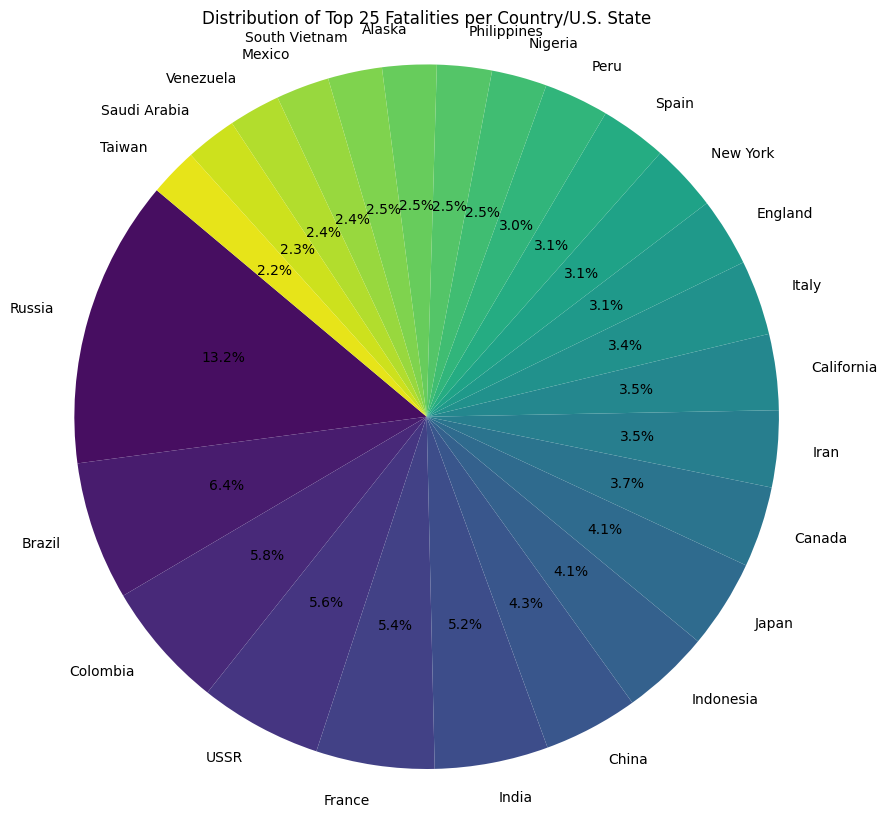

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


fatalities_by_state = fatality_locations.groupby('State/Country')['Fatalities'].sum().sort_values(ascending=False).head(25)


plt.figure(figsize=(10, 10))
plt.pie(fatalities_by_state, labels=fatalities_by_state.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(fatalities_by_state)))
plt.title('Distribution of Top 25 Fatalities per Country/U.S. State')
plt.axis('equal')
plt.show()